In [ ]:
!unzip "/content/drive/My Drive/ADM/dataset3.zip" -d "/content/sample_data/dataset"

Archive:  /content/drive/My Drive/ADM/dataset3.zip
replace /content/sample_data/dataset/dataset3/test_images_from_train/00fb450622785388.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
# Make sure we are pointing to the directory that has all the files necessary
import numpy as np 
import pandas as pd 
import sys, requests, shutil, os
import numpy as np
from shutil import copyfile
import urllib
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D
from tensorflow.keras import applications
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
#from tensorflow.keras.utils.np_utils import to_categorical
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Model
import csv
import os
import cv2
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import math
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
import argparse
import random
import tensorflow as tf
import tensorflow.keras
from keras.optimizers import SGD, Adam

In [ ]:
cd "/content/sample_data/dataset/dataset3"

/content/sample_data/dataset/dataset3


In [ ]:
# This is where we fine tune the pretrained model according to our dataset
img_width, img_height = 96, 96
save_model_weights = "VGG16_weights.h5"
train_data_dir = 'train_images_model'
validation_data_dir = 'validation_images_model'
batch_size = 200
epochs = 100
def train_VGG16():

    

    base_model = applications.VGG16(weights='imagenet',include_top= False,input_shape=(96,96,3))
    top_model = Sequential()
    top_model.add(Flatten(input_shape=base_model.output_shape[1:]))
    top_model.add(Dense(256, activation='relu'))
    top_model.add(Dense(256, activation='relu'))
    n_class = 6000
    top_model.add(Dense(n_class, activation='softmax'))    

    model = Model(base_model.input, top_model(base_model.output))
    # set the first 16 layers to non-trainable (weights will not be updated) 
    # 1 conv layer and three dense layers will be trained
    for layer in model.layers[:16]:
        layer.trainable = False
    #model.load_weights("/content/sample_data/dataset/dataset3/VGG16_weights.h5")
    model.compile(loss='categorical_crossentropy',
                  optimizer=optimizers.Adam(lr=0.001, beta_1=0.9,beta_2=0.999,epsilon=1e-8, decay=0.0),
                  metrics=['accuracy'])
    print ('Compilation done.')
    
    train_datagen = ImageDataGenerator(rescale=1. / 255,
                                       rotation_range=90,
                                        width_shift_range=0.2,
                                        height_shift_range=0.2,
                                        zoom_range = 0.5)
    
    valid_datagen = ImageDataGenerator(rescale=1. / 255)

    train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='categorical')

    #np.save('class_indices.npy', train_generator.class_indices)

    validation_generator = valid_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='categorical')
    
    print ('Model fit begins...')
    history1=model.fit_generator(
        train_generator,
        steps_per_epoch=150,
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=75,
        callbacks=[ModelCheckpoint(filepath="vgg16_weights_tf_dim_ordering_tf_kernels-notop.h5", 
                                   save_best_only=True, save_weights_only=True)]
        )
    
    model.save_weights(save_model_weights)
    # final weights are saved in bottleneck_fc_model.h5 file
    return history1
history1=train_VGG16()

Compilation done.
Found 246794 images belonging to 6000 classes.
Found 54916 images belonging to 6000 classes.
Model fit begins...


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Epoch 1/100
150/150 [==============================] - 108s 722ms/step - loss: 7.4300 - accuracy: 0.0090 - val_loss: 7.1718 - val_accuracy: 0.0139
Epoch 2/100
150/150 [==============================] - 109s 729ms/step - loss: 6.9714 - accuracy: 0.0192 - val_loss: 6.9208 - val_accuracy: 0.0205
Epoch 3/100
150/150 [==============================] - 108s 722ms/step - loss: 6.6725 - accuracy: 0.0275 - val_loss: 6.6716 - val_accuracy: 0.0251
Epoch 4/100
150/150 [==============================] - 109s 726ms/step - loss: 6.5231 - accuracy: 0.0335 - val_loss: 6.4537 - val_accuracy: 0.0350
Epoch 5/100
150/150 [==============================] - 109s 726ms/step - loss: 6.4007 - accuracy: 0.0410 - val_loss: 6.3077 - val_accuracy: 0.0434
Epoch 6/100
150/150 [==============================] - 109s 727ms/step - loss: 6.2400 - accuracy: 0.0529 - val_loss: 6.3571 - val_accuracy: 0.0443
Epoch 7/100
150/150 [==============================] - 110s 731ms/step - loss: 6.1298 - accuracy: 0.0607 - val_loss: 6

In [ ]:
history1

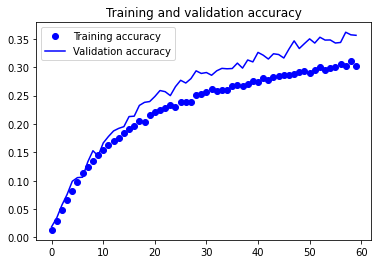

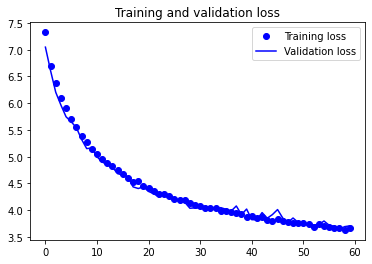

In [ ]:
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']
loss = history1.history['loss']
val_loss = history1.history['val_loss']
epochs = range(60)
plt.figure()
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()
epochs = range(60)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()